In [1]:
%matplotlib inline

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np

In [3]:
# read data from csv file taken from kaggle competition 
#https://www.kaggle.com/saydogmus/cnc-machines-breakdown-dataset

original_data = pd.read_csv("data/breakdownlist.csv", sep = ';', index_col='id')

In [4]:
original_data.head(10)

,cncmachine,cause,personnelid,starting,ending,total
id,,,,,,
1,M31,Cleaning,25.0,6.02.2018 14:00,7.02.2018 09:30,1170.0
2,M34,breakdown,14.0,22.02.2018 17:22,23.02.2018 09:04,942.0
3,M38,Cleaning,35.0,29.03.2018 15:02,29.03.2018 15:04,2.0
4,M35,Cleaning,39.0,7.04.2018 09:43,7.04.2018 11:15,92.0
5,M39,breakdown,3.0,10.04.2018 13:02,11.04.2018 09:13,1211.0
6,TG3,breakdown,37.0,12.04.2018 12:38,12.04.2018 12:40,2.0
7,NaN,NaN,NaN,13.04.2018 10:04,17.04.2018 14:23,6019.0
8,M03,breakdown,39.0,13.04.2018 10:05,13.04.2018 14:12,247.0
9,M03,breakdown,39.0,18.04.2018 13:44,18.04.2018 14:33,49.0


In [5]:
# copy original dataset to make some data manipulations
data_copy = original_data.copy()

In [6]:
data_copy.starting[0:5]

id
1     6.02.2018 14:00
2    22.02.2018 17:22
3    29.03.2018 15:02
4     7.04.2018 09:43
5    10.04.2018 13:02
Name: starting, dtype: object

In [7]:
#columns that consists of date and time originaly are dtype(object)
#changing dtype to datetime by defining format using https://strftime.org/

data_copy['starting'] = pd.to_datetime(data_copy['starting'], format = '%d.%m.%Y %H:%M')
data_copy['ending'] = pd.to_datetime(data_copy['ending'], format = '%d.%m.%Y %H:%M')

In [8]:
#separating start date and time into individual columns

data_copy['starting_date'] = pd.to_datetime(data_copy['starting']).dt.date
data_copy['starting_time'] = pd.to_datetime(data_copy['starting']).dt.time

In [9]:
#separating end date and time into individual columns

data_copy['ending_date'] = pd.to_datetime(data_copy['ending']).dt.date
data_copy['ending_time'] = pd.to_datetime(data_copy['ending']).dt.time

In [10]:
data_copy.head(10)

,cncmachine,cause,personnelid,starting,ending,total,starting_date,starting_time,ending_date,ending_time
id,,,,,,,,,,
1,M31,Cleaning,25.0,2018-02-06 14:00:00,2018-02-07 09:30:00,1170.0,2018-02-06,14:00:00,2018-02-07,09:30:00
2,M34,breakdown,14.0,2018-02-22 17:22:00,2018-02-23 09:04:00,942.0,2018-02-22,17:22:00,2018-02-23,09:04:00
3,M38,Cleaning,35.0,2018-03-29 15:02:00,2018-03-29 15:04:00,2.0,2018-03-29,15:02:00,2018-03-29,15:04:00
4,M35,Cleaning,39.0,2018-04-07 09:43:00,2018-04-07 11:15:00,92.0,2018-04-07,09:43:00,2018-04-07,11:15:00
5,M39,breakdown,3.0,2018-04-10 13:02:00,2018-04-11 09:13:00,1211.0,2018-04-10,13:02:00,2018-04-11,09:13:00
6,TG3,breakdown,37.0,2018-04-12 12:38:00,2018-04-12 12:40:00,2.0,2018-04-12,12:38:00,2018-04-12,12:40:00
7,NaN,NaN,NaN,2018-04-13 10:04:00,2018-04-17 14:23:00,6019.0,2018-04-13,10:04:00,2018-04-17,14:23:00
8,M03,breakdown,39.0,2018-04-13 10:05:00,2018-04-13 14:12:00,247.0,2018-04-13,10:05:00,2018-04-13,14:12:00
9,M03,breakdown,39.0,2018-04-18 13:44:00,2018-04-18 14:33:00,49.0,2018-04-18,13:44:00,2018-04-18,14:33:00


In [11]:
# import libraries for plotting

import seaborn as sns
import matplotlib as plt

In [12]:
#clean data from raws with NULL data (empty cells - any missing information)

data_copy.dropna(inplace=True)

In [13]:
#group data by cncmachine and cause of breakdown, calculate sum for total column

machine_use = data_copy.groupby(['cncmachine', 'cause']).sum()

In [14]:
machine_use

personnelid    total
cncmachine cause                          
M01        Cleaning         269.0   9149.0
           breakdown        208.0   5172.0
M02        Cleaning         122.0   1398.0
           breakdown        157.0   7164.0
M03        Cleaning         225.0  14849.0
           breakdown        774.0  13675.0
M04        Cleaning         116.0   3135.0
           breakdown         11.0     20.0
           other             11.0     35.0
M05        Cleaning         675.0   9973.0
           breakdown        346.0   6329.0
           trouble           56.0     73.0
M06        Cleaning         128.0    193.0
           breakdown        283.0   6003.0
M07        Cleaning         549.0  14619.0
           breakdown        100.0   3096.0
M08        Cleaning          52.0     17.0
           breakdown         73.0   1610.0
           other            105.0   5763.0
M09        Cleaning         208.0  12076.0
           breakdown         71.0   7091.0
M10        Cleaning         221.0  27042.0
           breakdown         80.0   5614.0
M31        Cleaning         187.0  16906.0
           breakdown        145.0  13036.0
M32        Cleaning          61.0   9040.0
           breakdown        143.0   3810.0
M33        Cleaning         157.0  16391.0
           breakdown         84.0   3256.0
M34        Cleaning          63.0   1746.0
           breakdown         77.0   9939.0
           other             40.0   2904.0
M35        Cleaning          39.0     92.0
           other             39.0      3.0
M35-1      Cleaning         366.0  73455.0
           breakdown        692.0   2979.0
M35-2      Cleaning         235.0  73246.0
           breakdown        640.0   4170.0
M36        Cleaning         122.0   4416.0
           breakdown         82.0    404.0
           other            227.0    202.0
M37        Cleaning         254.0  15938.0
           breakdown         77.0   1588.0
           other             21.0      4.0
M38        Cleaning         149.0   5963.0
           breakdown        228.0    392.0
           other             25.0   2776.0
           trouble          118.0   4212.0
M39        Cleaning         457.0  10413.0
           breakdown        103.0  14007.0
           other             75.0     59.0
M40        Cleaning          73.0   7290.0
           breakdown         18.0  10243.0
M42        Cleaning          18.0   1343.0
           breakdown        163.0   7567.0
M43        breakdown        101.0   7657.0
TG1        Cleaning          39.0    478.0
TG24       breakdown          6.0    168.0
TG3        breakdown         37.0      2.0

In [15]:
# weare not interested in the summed up personnel id, and thus need to drop it from dataset

machine_use.drop(columns='personnelid', inplace=True)

In [16]:
#lets look at newly generated dataset from group by, and its complexity

machine_use.index

MultiIndex(levels=[['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M31', 'M32', 'M33', 'M34', 'M35', 'M35-1', 'M35-2', 'M36', 'M37', 'M38', 'M39', 'M40', 'M42', 'M43', 'TG1', 'TG24', 'TG3'], ['Cleaning', 'breakdown', 'other', 'trouble']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 21, 21, 22, 22, 23, 24, 25, 26], [0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 3, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1]],
           names=['cncmachine', 'cause'])

In [17]:
#dataset can be considered from two levels, lets look at first one

machine_use.unstack(level=0)

total                                                            \
cncmachine     M01     M02      M03     M04     M05     M06      M07     M08   
cause                                                                          
Cleaning    9149.0  1398.0  14849.0  3135.0  9973.0   193.0  14619.0    17.0   
breakdown   5172.0  7164.0  13675.0    20.0  6329.0  6003.0   3096.0  1610.0   
other          NaN     NaN      NaN    35.0     NaN     NaN      NaN  5763.0   
trouble        NaN     NaN      NaN     NaN    73.0     NaN      NaN     NaN   

                             ...                                              \
cncmachine      M09      M10 ...      M36      M37     M38      M39      M40   
cause                        ...                                               
Cleaning    12076.0  27042.0 ...   4416.0  15938.0  5963.0  10413.0   7290.0   
breakdown    7091.0   5614.0 ...    404.0   1588.0   392.0  14007.0  10243.0   
other           NaN      NaN ...    202.0      4.0  2776.0     59.0      NaN   
trouble         NaN      NaN ...      NaN      NaN  4212.0      NaN      NaN   

                                               
cncmachine     M42     M43    TG1   TG24  TG3  
cause                                          
Cleaning    1343.0     NaN  478.0    NaN  NaN  
breakdown   7567.0  7657.0    NaN  168.0  2.0  
other          NaN     NaN    NaN    NaN  NaN  
trouble        NaN     NaN    NaN    NaN  NaN  

[4 rows x 27 columns]

In [18]:
#lets look at second level

machine_use.unstack(level=1)

total                          
cause      Cleaning breakdown   other trouble
cncmachine                                   
M01          9149.0    5172.0     NaN     NaN
M02          1398.0    7164.0     NaN     NaN
M03         14849.0   13675.0     NaN     NaN
M04          3135.0      20.0    35.0     NaN
M05          9973.0    6329.0     NaN    73.0
M06           193.0    6003.0     NaN     NaN
M07         14619.0    3096.0     NaN     NaN
M08            17.0    1610.0  5763.0     NaN
M09         12076.0    7091.0     NaN     NaN
M10         27042.0    5614.0     NaN     NaN
M31         16906.0   13036.0     NaN     NaN
M32          9040.0    3810.0     NaN     NaN
M33         16391.0    3256.0     NaN     NaN
M34          1746.0    9939.0  2904.0     NaN
M35            92.0       NaN     3.0     NaN
M35-1       73455.0    2979.0     NaN     NaN
M35-2       73246.0    4170.0     NaN     NaN
M36          4416.0     404.0   202.0     NaN
M37         15938.0    1588.0     4.0     NaN
M38          5963.0     392.0  2776.0  4212.0
M39         10413.0   14007.0    59.0     NaN
M40          7290.0   10243.0     NaN     NaN
M42          1343.0    7567.0     NaN     NaN
M43             NaN    7657.0     NaN     NaN
TG1           478.0       NaN     NaN     NaN
TG24            NaN     168.0     NaN     NaN
TG3             NaN       2.0     NaN     NaN

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f71d240>,
      dtype=object)

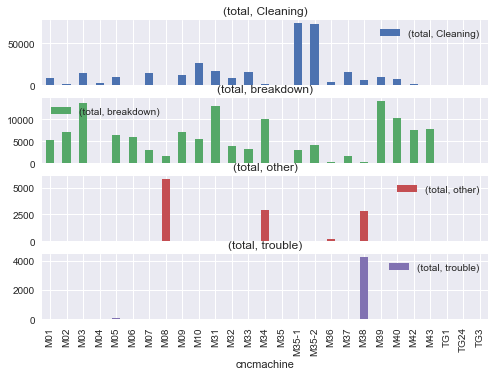

In [19]:
#the second level is more redeavle so lets try to plot it

machine_use.unstack(level=1).plot(kind='bar', subplots=True)